In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [98]:
df_NP15=pd.read_excel('cleansing_data_californai_NP15.xlsx')

x=np.array([[1,2,3,4]])
y=np.array([[1]])

for x1, x2, x3, x4, y1 in zip(list(df_NP15['Carbon price']), 
                             list(df_NP15['Wtd avg price $/MMBtu']), 
                             list(df_NP15['Daily volume MWh']),
                             list(df_NP15['Daily volume MMBtu']), 
                             list(df_NP15['Average NP15 Elec price $/MWh'])):
    
    x=np.append(x, [[x1, x2, x3, x4]], axis=0)
    y=np.append(y, [[y1]], axis=0)
x=np.delete(x,0,0)
y=np.delete(y,0,0)
y.shape = (len(y))

In [99]:
# list(df_NP15)

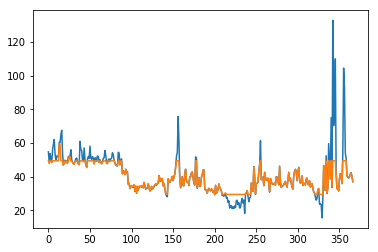

In [100]:


clf = SVR(gamma=0.1, C=10, epsilon=0.2)
clf.fit(x, y) 

result=clf.predict(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y)
ax.plot(result)
plt.show()


244
123


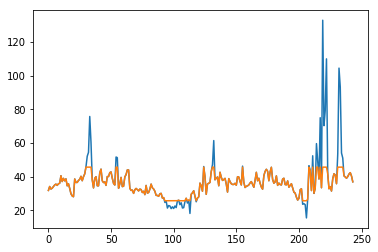

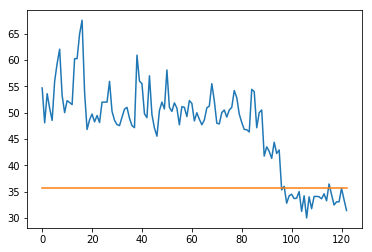

-1.958585079297059
245
122


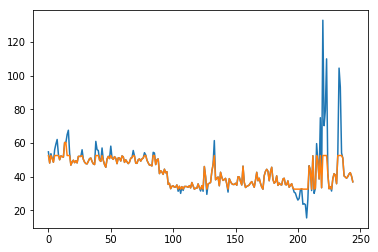

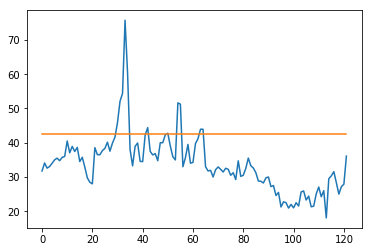

-1.1001493768920172
245
122


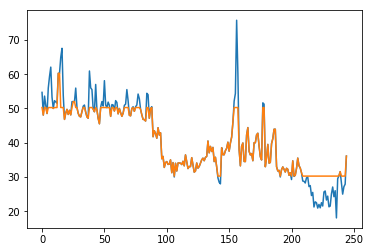

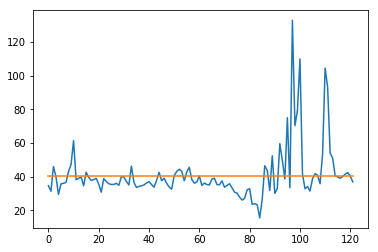

-0.0009638730774015336


In [101]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(len(x_train))
    print(len(x_test))
    clf = SVR(gamma=0.1, C=10, epsilon=0.002)
    clf.fit(x_train, y_train) 
    result=clf.predict(x_train)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(y_train)
    ax.plot(result)
    plt.show()
    result=clf.predict(x_test)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(y_test)
    ax.plot(result)
    plt.show()
    print(clf.score(x_test, y_test))

In [57]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

-0.0009638730774015336


-0.0009638730774015336

-488026.67321113

In [50]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Train data", X_train, "Target data", y_train)

KFold(n_splits=2, random_state=None, shuffle=False)
Train data [[5 6]
 [7 8]] Target data [3 4]
Train data [[1 2]
 [3 4]] Target data [1 2]


In [46]:
X_train

array([[1, 2],
       [3, 4]])

In [103]:
df=pd.DataFrame()
df['Average NP15 Elec price $/MWh']=df_NP15['Average NP15 Elec price $/MWh']
df['Carbon price']=df_NP15['Carbon price']
df['Wtd avg price $/MMBtu']=df_NP15['Wtd avg price $/MMBtu']
df['Daily volume MWh']=df_NP15['Daily volume MWh']
df['Daily volume MMBtu']=df_NP15['Daily volume MMBtu']
corr = df.corr()

In [104]:
corr

,Average NP15 Elec price $/MWh,Carbon price,Wtd avg price $/MMBtu,Daily volume MWh,Daily volume MMBtu
Average NP15 Elec price $/MWh,1.000000,-0.030042,0.607122,0.091300,0.015502
Carbon price,-0.030042,1.000000,-0.463541,-0.142143,-0.134785
Wtd avg price $/MMBtu,0.607122,-0.463541,1.000000,-0.029718,-0.029503
Daily volume MWh,0.091300,-0.142143,-0.029718,1.000000,-0.039794
Daily volume MMBtu,0.015502,-0.134785,-0.029503,-0.039794,1.000000


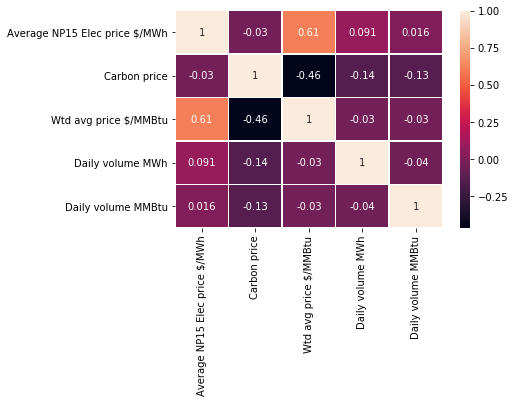

In [107]:
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()


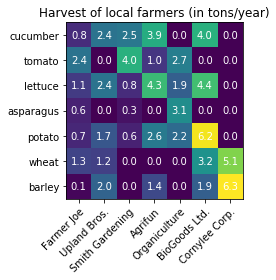

In [151]:
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()